# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: To determine who is likeliest to get into graduate school based on their GPA, GRE, school prestige. Additionally to determine which variables have the most impact on admission

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: I dropped the rows with null data points. GPA and GRE are somewhat normally distributed and also skewed, but the prestige of schools is not normally distributed, but no need to adapt when using logistic regression. Since prestige is a categorical variable it should be split into 4 dummy varibales to better understand its impact. Once that is done the original prestige variable should be dropped and one of the dummy variables should be dropped since it is explained by the other 3.

### Demo: Provide a table that explains the data by admission status

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [10]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 

In [11]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])


prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


In [12]:
admit = df.loc[df['admit'] == 1]

In [15]:
admit.describe()

,admit,gre,gpa,prestige
count,126.0,126.000000,126.000000,126.000000
mean,1.0,618.571429,3.489206,2.150794
std,0.0,109.257233,0.371655,0.921455
min,1.0,300.000000,2.420000,1.000000
25%,1.0,540.000000,3.220000,1.000000
50%,1.0,620.000000,3.545000,2.000000
75%,1.0,680.000000,3.757500,3.000000
max,1.0,800.000000,4.000000,4.000000


In [16]:
rejected = df.loc[df['admit'] == 0]

In [17]:
rejected.describe()

,admit,gre,gpa,prestige
count,271.0,271.000000,271.000000,271.000000
mean,0.0,573.579336,3.347159,2.645756
std,0.0,116.052798,0.376355,0.918922
min,0.0,220.000000,2.260000,1.000000
25%,0.0,500.000000,3.080000,2.000000
50%,0.0,580.000000,3.340000,3.000000
75%,0.0,660.000000,3.610000,3.000000
max,0.0,800.000000,4.000000,4.000000


In [19]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

In [21]:
print handCalc.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


Mean (STD) or counts by admission status for each variable 

percentages of prestige are as a percent of the not admitted or admitted categories.

| Not Admitted | Admitted
---| ---|---
GPA | mean= 3.38 std=0.376  | mean= 3.49 std=0.372
GRE | mean= 573.58 std=116.05 | mean= 618.57 std=109.26
Prestige 1 | 10.3% | 26.1%
Prestige 2 | 35% | 42%
Prestige 3 |34.4% | 22.2%
Prestige 4 |20.3% | 9.5%

### Methods: Write up the methods used in your analysis

In [22]:
handCalc['intercept'] = 1.0

In [23]:
train_cols = handCalc.columns[1:]

In [25]:
logit = sm.Logit(handCalc['admit'], handCalc[train_cols])
result = logit.fit()
print result.summary()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        21:42:08   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793

In [28]:


params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)



                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


Answer:I performed a logistic regression on the modified dataset (used dummy variables for prestige and dropped prestige 1)

### Results: Write up your results

Answer: It looks like based on GPA having the higest coefficient that it is the most important variable in the model. The odds of being admitted increase by 118% with a one point increase in the GPA. Cancidates with a GPA of 4.0 and a GRE score of 800 have a much higher liklihood of being admitted than those who have lower scores and a lower GPA.

In [34]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]

    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [35]:
gres = np.linspace(handCalc['gre'].min(), handCalc['gre'].max(), 10)

gpas = np.linspace(handCalc['gpa'].min(), handCalc['gpa'].max(), 10)

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

In [36]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']

In [37]:
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

In [38]:
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])

In [39]:
combos['admit_pred'] = result.predict(combos[train_cols])

In [43]:
combos.tail(4)


,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,0.734040
397,800.0,4.0,2.0,1.0,1.0,0.0,0.0,0.582995
398,800.0,4.0,3.0,1.0,0.0,1.0,0.0,0.419833
399,800.0,4.0,4.0,1.0,0.0,0.0,1.0,0.368608


In [44]:
combos.head(4)

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
0,220.0,2.26,1.0,1.0,0.0,0.0,0.0,0.164173
1,220.0,2.26,2.0,1.0,1.0,0.0,0.0,0.090492
2,220.0,2.26,3.0,1.0,0.0,1.0,0.0,0.048977
3,220.0,2.26,4.0,1.0,0.0,0.0,1.0,0.039890


### Visuals: Provide a table or visualization of these results

In [ ]:
### The tables of the results are above

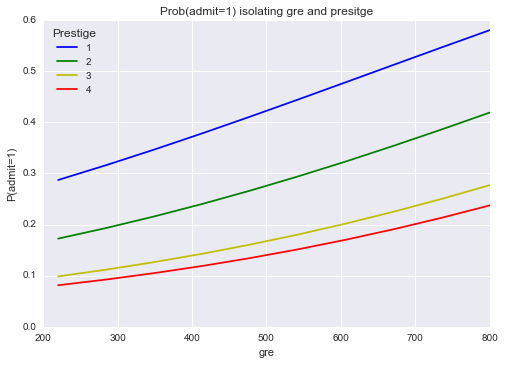

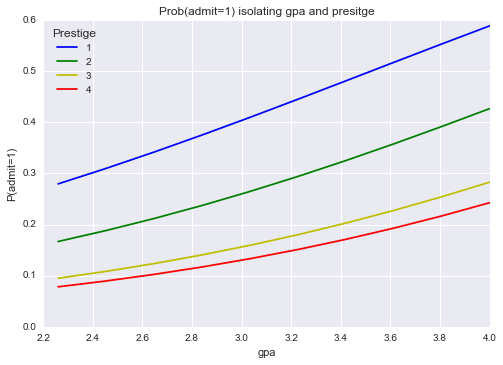

In [45]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')

### Discussion: Write up your discussion and future steps

Answer: The data indicates that students with a higher GPA and GRE score as well as a more prestigious undergraduate school have a higher liklihood of being admitted to grad school. To truly verify this model I would use the model to predict admissions results of future applications and see how the model predictions compares against actual admissions scores